In [ ]:

# pip install lime

1.6.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# !pip install scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import (
    mutual_info_classif,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from lime import lime_tabular

from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_absolute_error


In [ ]:
import numba as nb
from matplotlib import cm
import seaborn as sns
%matplotlib inline
from scipy import stats
import matplotlib.colors as mcolors
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import sklearn.metrics as skm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from collections import Counter
import math
from skrebate import ReliefF
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn_som.som import SOM
import shap
from lime import lime_tabular

In [ ]:
pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f778ed3f2a8cc2cd9d2cb6ade2aed4f41cdb9ad65ba9e02e4dcdaf61e7991743
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:

!pip install sklearn-som

In [ ]:
!pip install -U som-learn

ERROR: Could not find a version that satisfies the requirement som-learn (from versions: none)
ERROR: No matching distribution found for som-learn


In [ ]:
!pip install skrebate


  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=1c1d5b3ab0066cec12058c1c98c46c113e7e44f1c5ec9d4e888a8245bbaaca0e
  Stored in directory: /root/.cache/pip/wheels/8a/d2/67/8368fca718041057b33d6448ca526aaf1ce2e404c94b901e41
Successfully built skrebate


In [ ]:
!pip install mlxtend


In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

from the boxplot of Pregnancies vs Diabetes Outcome, we saw that Diabetic patients tend to have a higher median number of pregnancies than non-diabetic patients and the range and outliers also show that some diabetic patients have significantly more pregnancies at the end, There is a positive association between the number of pregnancies and diabetes risk in this dataset.

# II. Data Pre-Processing

## (I) Data spliting and scaling

- **Spliting** dataframe for training, testing and validation
- **Scaling** the predictor to normalize the impact factor, since each predictor has a different degree of impact on the outcome
    \

In [ ]:
def data_split(data):

    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state=0)
    return train_x, test_x, train_y, test_y

def data_scaling(train_x, test_x):
    ss = StandardScaler()
    ss_model = ss.fit(train_x)
    train_x_scaled = ss_model.transform(train_x)
    test_x_scaled = ss_model.transform(test_x)
    return train_x_scaled, test_x_scaled


def data_scaling_plot(data):
    X = data.iloc[:,:-1].to_numpy()
    y = data.iloc[:,-1].to_numpy()
    ss = StandardScaler()
    ss_model = ss.fit(X)
    X_scaled = ss_model.transform(X)
    np_new = np.hstack((X_scaled, y.reshape(len(y),1)))
    column_headers = data.columns.values.tolist()
    df_new = pd.DataFrame(data = np_new, columns = column_headers)
    return df_new


## (II) Data balancing

### Check the number of each class

In [ ]:
def check_num(df):
  print("Class 0:", (df.iloc[:,-1] == 0).sum())
  print("Class 1:", (df.iloc[:,-1] == 1).sum())

### Oversample

Oversample will not be used since it will introduced bias

In [ ]:
def oversample(df):
  #create two different dataframe of majority and minority class
  if ((df.iloc[:,-1] == 0).sum()) >= ((df.iloc[:,-1] == 1).sum()):
    df_majority = df[(df.iloc[:,-1] == 0)]
    df_minority = df[(df.iloc[:,-1] == 1)]
    n_major = (df.iloc[:,-1] == 0).sum()
  else:
    df_majority = df[(df.iloc[:,-1] == 1)]
    df_minority = df[(df.iloc[:,-1] == 0)]
    n_major = (df.iloc[:,-1] == 1).sum()

  # oversample minority class
  df_minority_oversample = resample(df_minority,
                                  replace=True,
                                  n_samples= n_major,
                                  random_state=42)
  # Combine
  resample_df = pd.concat([df_minority_oversample, df_majority])

  # Shuffle
  resample_df = resample_df.sample(frac=1, random_state=0).reset_index(drop=True)

  return resample_df

### Undersample

In [ ]:
def undersample(df):
  #create two different dataframe of majority and minority class
  if ((df.iloc[:,-1] == 0).sum()) >= ((df.iloc[:,-1] == 1).sum()):
    df_majority = df[(df.iloc[:,-1] == 0)]
    df_minority = df[(df.iloc[:,-1] == 1)]
    n_minor = (df.iloc[:,-1] == 1).sum()
  else:
    df_majority = df[(df.iloc[:,-1] == 1)]
    df_minority = df[(df.iloc[:,-1] == 0)]
    n_minor = (df.iloc[:,-1] == 0).sum()

  # oversample minority class
  df_majority_undersample = resample(df_majority,
                                  replace=True,
                                  n_samples= n_minor,
                                  random_state=42)
  # Combine
  resample_df = pd.concat([df_majority_undersample, df_minority])

  # Shuffle
  resample_df = resample_df.sample(frac=1, random_state=1).reset_index(drop=True)

  return resample_df

## (III) Data visualization

### 2D: PCA & t-SNE

In [ ]:
def dim2(df, size, markersize):

  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

# PCA
  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(x_scaled)

  np_pca = np.hstack((x_pca, y.reshape(len(y),1)))

  column_pca = ['pc_0', 'pc_1', 'class']

  df_pca = pd.DataFrame(data = np_pca, columns = column_pca)


  df_0_pca = df_pca[(df_pca.iloc[:,-1] == 0)]
  df_1_pca = df_pca[(df_pca.iloc[:,-1] == 1)]
  x_0_pca = df_0_pca.iloc[:,:-1].to_numpy()
  x_1_pca = df_1_pca.iloc[:,:-1].to_numpy()

# t-SNE

  tsne = TSNE(n_components=2)

  x_tsne = tsne.fit_transform(x_scaled)

  np_tsne = np.hstack((x_tsne, y.reshape(len(y),1)))

  column_tsne = ['dim_0', 'dim_1', 'class']

  df_tsne = pd.DataFrame(data = np_tsne, columns = column_tsne)


  df_0_tsne = df_tsne[(df_tsne.iloc[:,-1] == 0)]
  df_1_tsne = df_tsne[(df_tsne.iloc[:,-1] == 1)]
  x_0_tsne = df_0_tsne.iloc[:,:-1].to_numpy()
  x_1_tsne = df_1_tsne.iloc[:,:-1].to_numpy()


#  plot

  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121)

  class_0_pca = ax.scatter(x_0_pca[:,0], x_0_pca[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_pca = ax.scatter(x_1_pca[:,0], x_1_pca[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax.legend(handles=[class_0_pca, class_1_pca] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('PCA', size = 12)

  ax2 = plt.subplot(122)

  class_0_tsne = ax2.scatter(x_0_tsne[:,0], x_0_tsne[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_tsne = ax2.scatter(x_1_tsne[:,0], x_1_tsne[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[class_0_tsne, class_1_tsne] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('t-SNE', size = 12)


  plt.show()

### 2D: PCA only:

This served as a helper function for visualize the outcome of each classifier.

In [ ]:
def pca_plot(test_x_scaled, test_y, test_y_pred, size, markersize):

  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(test_x_scaled)

  true_np = np.hstack((x_pca, test_y.reshape(len(test_y),1)))

  pred_np = np.hstack((x_pca, test_y_pred.reshape(len(test_y_pred),1)))

  column_true = ['pc_0', 'pc_1', 'true']

  column_pred = ['pc_0', 'pc_1', 'pred']

  true_df = pd.DataFrame(data = true_np, columns = column_true)

  pred_df = pd.DataFrame(data = pred_np, columns = column_pred)

  true_df_0 = true_df[(true_df.iloc[:,-1] == 0)]
  true_df_1 = true_df[(true_df.iloc[:,-1] == 1)]
  true_x_0 = true_df_0.iloc[:,:-1].to_numpy()
  true_x_1 = true_df_1.iloc[:,:-1].to_numpy()

  pred_df_0 = pred_df[(pred_df.iloc[:,-1] == 0)]
  pred_df_1 = pred_df[(pred_df.iloc[:,-1] == 1)]
  pred_x_0 = pred_df_0.iloc[:,:-1].to_numpy()
  pred_x_1 = pred_df_1.iloc[:,:-1].to_numpy()

  join_df = true_df.join(pred_df["pred"])

  correct_df = join_df[(join_df.true == join_df.pred)]

  wrong_df = join_df[(join_df.true != join_df.pred)]

  correct_df_0 = correct_df[(correct_df.iloc[:,-2] == 0)]
  correct_df_1 = correct_df[(correct_df.iloc[:,-2] == 1)]
  correct_x_0 = correct_df_0.iloc[:,:-2].to_numpy()
  correct_x_1 = correct_df_1.iloc[:,:-2].to_numpy()

  fn_df = wrong_df[(wrong_df.iloc[:,-1] == 0)]
  fp_df = wrong_df[(wrong_df.iloc[:,-1] == 1)]
  fn_x = fn_df.iloc[:,:-2].to_numpy()
  fp_x = fp_df.iloc[:,:-2].to_numpy()



# plot


  fig = plt.figure(figsize = (24, 5))

  ax1 = plt.subplot(131)


  true_class_0 = ax1.scatter(true_x_0[:,0], true_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  true_class_1 = ax1.scatter(true_x_1[:,0], true_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax1.legend(handles=[true_class_0, true_class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Ground Truth of Test Data', size = 12)

  ax2 = plt.subplot(132)


  pred_class_0 = ax2.scatter(pred_x_0[:,0], pred_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  pred_class_1 = ax2.scatter(pred_x_1[:,0], pred_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[pred_class_0, pred_class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Prediction', size = 12)


  ax3 = plt.subplot(133)

  correct_class_0 = ax3.scatter(correct_x_0[:,0], correct_x_0[:,1], c='blue', s=size, alpha=0.3, label='True Negative')
  correct_class_1 = ax3.scatter(correct_x_1[:,0], correct_x_1[:,1], c='orange', s=size, alpha=0.3, label='True Positive')
  fn_class = ax3.scatter(fn_x[:,0], fn_x[:,1], c='green', s=size, alpha=0.3, label='False Negative')
  fp_class = ax3.scatter(fp_x[:,0], fp_x[:,1], c='red', s=size, alpha=0.3, label='False Positive')
  ax3.legend(handles=[correct_class_0, correct_class_1, fn_class, fp_class] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.title('Comparison', size = 12)











### 3D: PCA

In [ ]:
def dim3(df, size, markersize):
  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

  pca_1 = PCA(n_components = 3).fit(x_scaled)

  Xt = pca_1.transform(x_scaled)

  new_np = np.hstack((Xt, y.reshape(len(y),1)))

  column_values = ['pc_0', 'pc_1', 'pc_2', 'class']

  new_df = pd.DataFrame(data = new_np, columns = column_values)


  df_0 = new_df[(new_df.iloc[:,-1] == 0)]
  df_1 = new_df[(new_df.iloc[:,-1] == 1)]
  x_0 = df_0.iloc[:,:-1].to_numpy()
  y_0 = df_0.iloc[:,-1].to_numpy()
  x_1 = df_1.iloc[:,:-1].to_numpy()
  y_1 = df_1.iloc[:,-1].to_numpy()


  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121, projection ="3d")
  class_0 = ax.scatter3D(x_0[:,0], x_0[:,1], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1 = ax.scatter3D(x_1[:,0], x_1[:,1], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')


  ax_2 = plt.subplot(122, projection ="3d")
  class_0_2 = ax_2.scatter3D(x_0[:,1], x_0[:,0], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_2 = ax_2.scatter3D(x_1[:,1], x_1[:,0], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax_2.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.show()



###  Check Nulls

In [ ]:
# drop NaN value
print("Any null value:", any(df.isnull()))
print("Any NaN value:", any(df.isna()))
print("Before Droping NaN Number of Rows:", len(df))

df = df.dropna()
print("After Droping NaN Number of Rows:", len(df))

df.tail()

Any null value: True
Any NaN value: True
Before Droping NaN Number of Rows: 768
After Droping NaN Number of Rows: 768


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

---
### 1.0.2 Data Balance

In [ ]:
check_num(df)

Class 0: 500
Class 1: 268


Undersample

In [ ]:
df = undersample(df)
check_num(df)

Class 0: 268
Class 1: 268


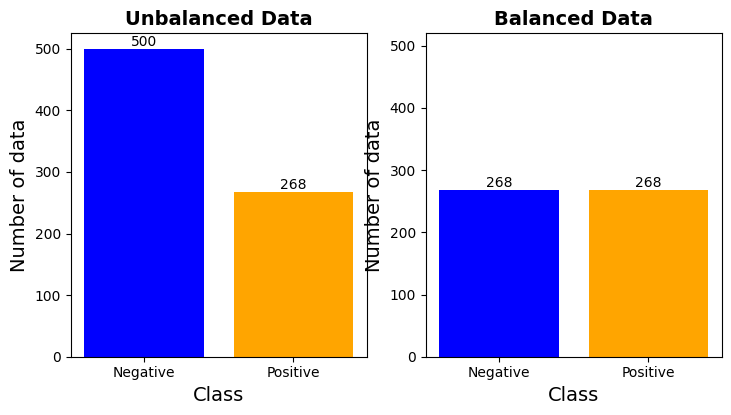

In [ ]:
plt.figure(figsize = (8.4, 4.2))

plt.subplot(1, 2, 1)
x = ["Negative", "Positive"]
h = [500,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Unbalanced Data", size=14, fontweight='bold')


plt.subplot(1, 2, 2)
x = ["Negative", "Positive"]
h = [268,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.ylim(0, 520)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Balanced Data", size=14, fontweight='bold')


plt.show()

### 1.0.3 Data Scaling

Before Scaling

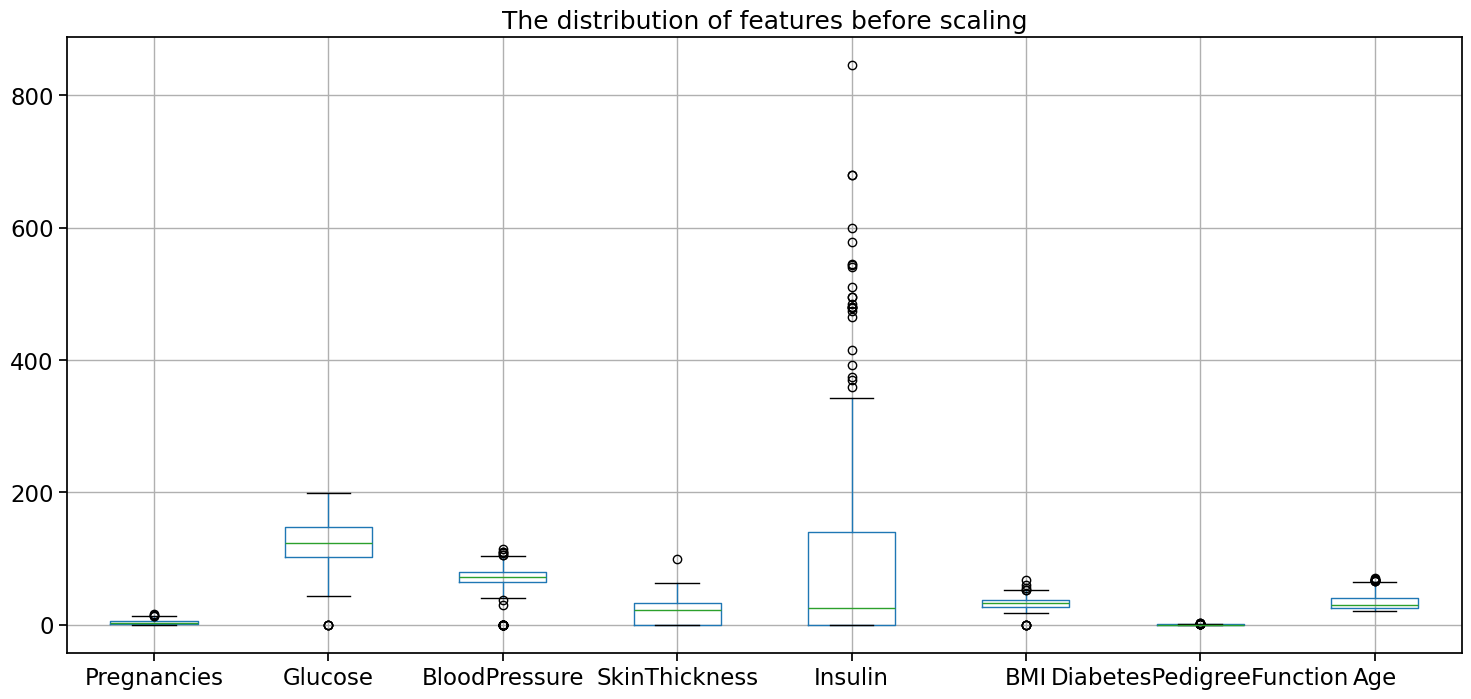

In [ ]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  df.boxplot(column=df.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")

After scaling

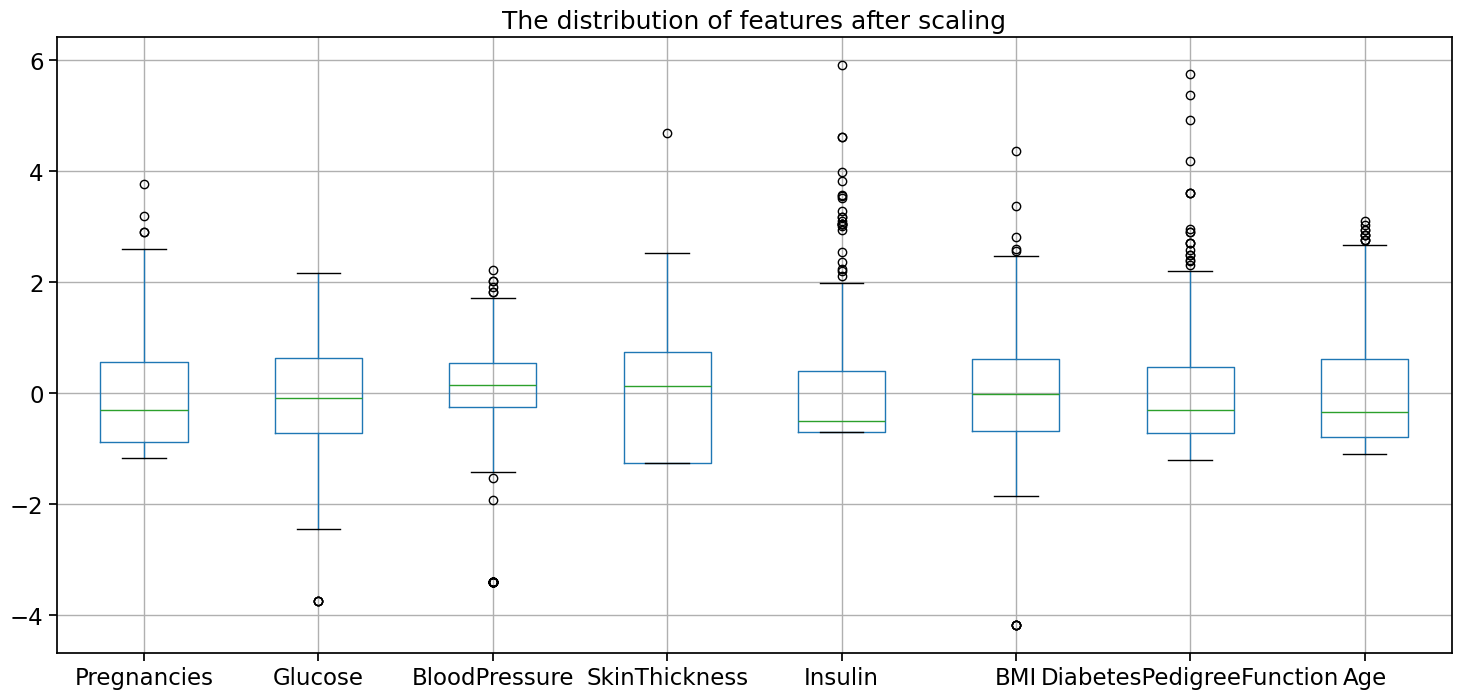

In [ ]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  data_scaling_plot(df).boxplot(column=df.columns.values.tolist()[:-1])
  plt.title("The distribution of features after scaling")

### 1.0.4 Data Visualization


#### 1.0.4.1 Visualization in 2D

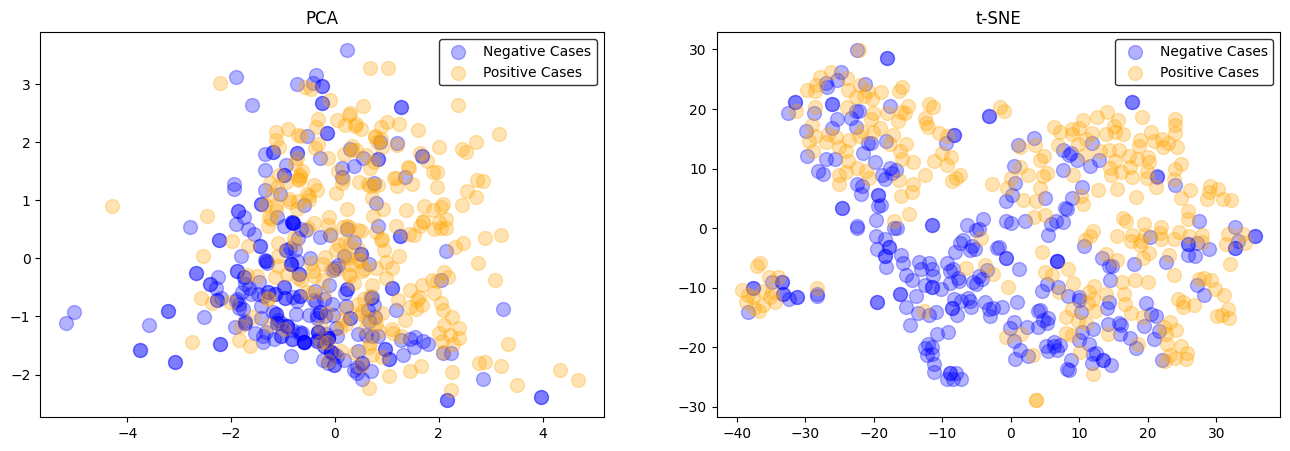

In [ ]:
dim2(df, 100, 1)

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              9      184             85             15        0  30.0   
1              0      138             60             35      167  34.6   
2              6      166             74              0        0  26.6   
3              0       95             85             25       36  37.4   
4              0      131              0              0        0  43.2   
..           ...      ...            ...            ...      ...   ...   
531            0      125             96              0        0  22.5   
532            5      104             74              0        0  28.8   
533            3      116             74             15      105  26.3   
534            1      135             54              0        0  26.7   
535            1       86             66             52       65  41.3   

     DiabetesPedigreeFunction  Age  Outcome  
0                       1.213   49        1  
1                       0.534   21        1  
2                       0.304   66        0  
3                       0.247   24        1  
4                       0.270   26        1  
..                        ...  ...      ...  
531                     0.262   21        0  
532                     0.153   48        0  
533                     0.107   24        0  
534                     0.687   62        0  
535                     0.917   29        0  

[536 rows x 9 columns]

In [ ]:
df['Outcome'].unique()


array([1, 0])

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

# Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Exreme Tree Classifier Using  Hyper parameters tuning with GridsearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 200, 300],
    'max_depth': [5,10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize classifier
model= ExtraTreesClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)



In [ ]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 200, 300]},
             scoring='accuracy')

In [ ]:
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
best_model = grid_search.best_estimator_

test_y_pred = best_model.predict(X_test)

Best n_estimators: 300


In [ ]:
cv_result = cross_validate(best_model, X_train, y_train, cv=5 ,scoring='accuracy',n_jobs=-1, return_train_score = True)
train_score = np.mean(cv_result['train_score'])
val_score = np.mean(cv_result['test_score'])



In [ ]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, test_y_pred).ravel()

# Model Performance

In [ ]:
print("Training Accuracy:", best_model.score(X_train, y_train))
print("CV Training Accuracy:", train_score)
print("Validation Score", val_score)
print("Testing Accuracy:", best_model.score(X_test, y_test))
print("Testing: Sensitivity:", true_positive/(true_positive+false_negative), "Specificity:", true_negative/(true_negative+false_positive))

Training Accuracy: 0.9527363184079602
CV Training Accuracy: 0.9490044697277529
Validation Score 0.7859259259259259
Testing Accuracy: 0.8059701492537313
Testing: Sensitivity: 0.855072463768116 Specificity: 0.7538461538461538


# Validation Curve

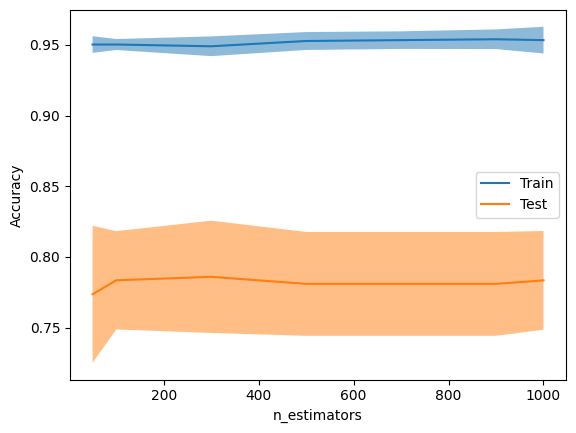

In [ ]:
from sklearn.model_selection import ValidationCurveDisplay
ValidationCurveDisplay.from_estimator(
    best_model,
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=[50, 100, 300, 500, 700, 900, 1000],
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Learning Curve

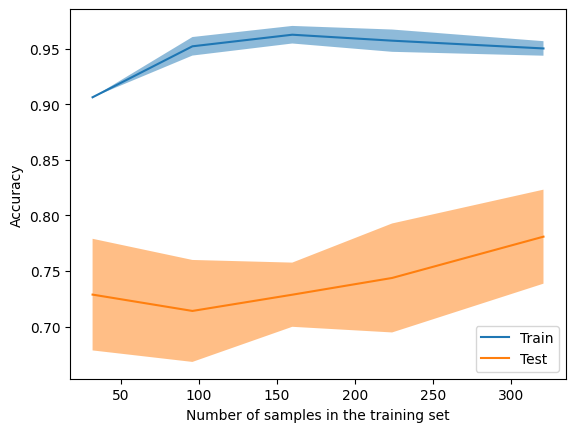

In [ ]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(
    best_model,
    X_train, y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

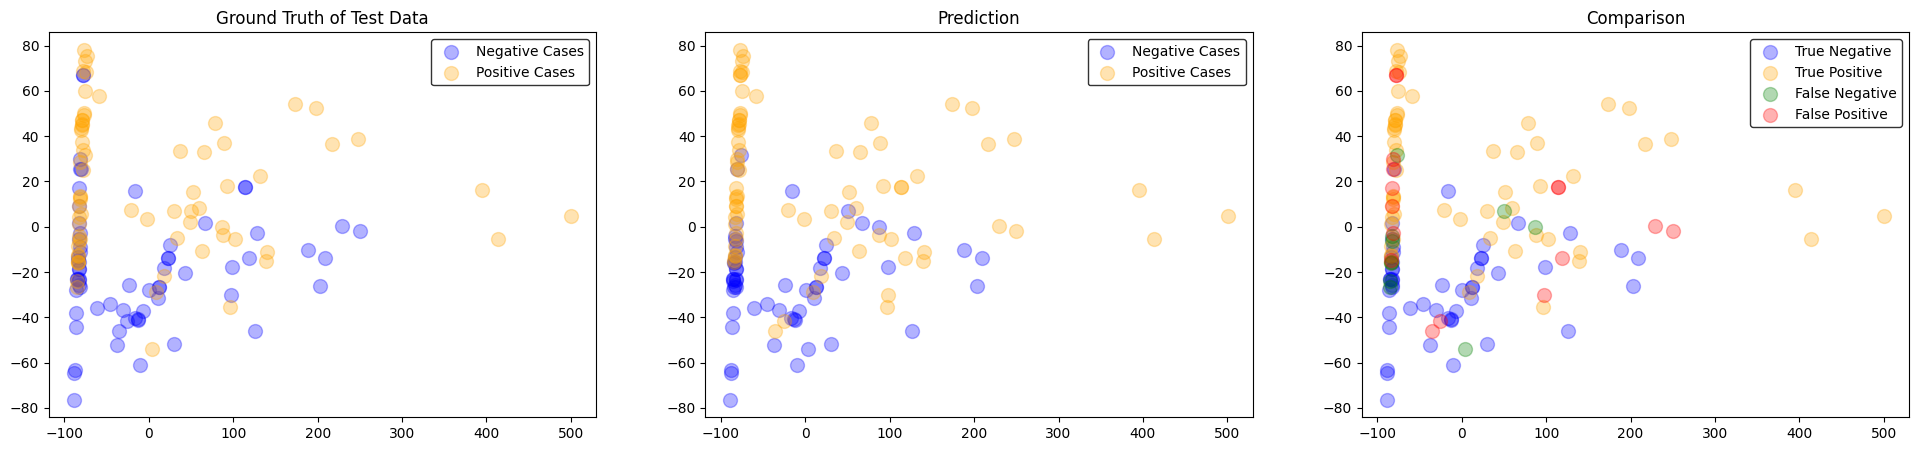

In [ ]:
pca_plot(X_test, y_test.to_numpy(), test_y_pred, 100, 1)


# Explainability Techniques

## Local Explanations
Local explanation methods help explain **individual predictions**.

- **LIME (Local Interpretable Model-agnostic Explanations):**
  - Generate a new  dataset from sample then fits a simple interpretable model (like linear regression) on the perturbed data.
  - It explains how each feature contributed to a specific prediction.

- **SHAP (SHapley Additive exPlanations):**
  - Based on Shapley values, It fairly distributes the prediction on all features.
  -It explains how much each feature increased or decreased a single prediction.

---

##  Global Explanations
Global methods help to  explain **overall model behavior**

- **ICE (Individual Conditional Expectation):**
  -  It shows how the prediction for **each individual instance** changes as a feature value differs (data point itself) so heterogeneity problem in PDP is splved.

- **PDP (Partial Dependence Plot):**
  - It shows the average prediction of a feature, it helps in  understand the general effect of a feature on model output.

- **PFI (Permutation Feature Importance):**
  - It shows how much a model’s performance decreases when a feature’s values are randomly shuffled.


# LIME

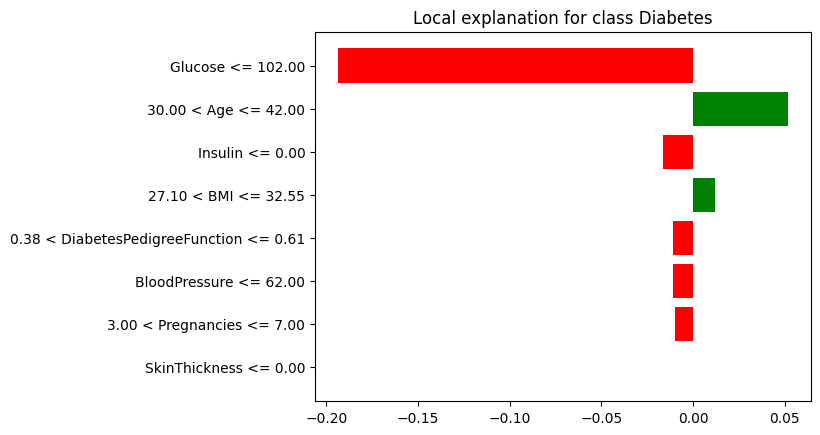

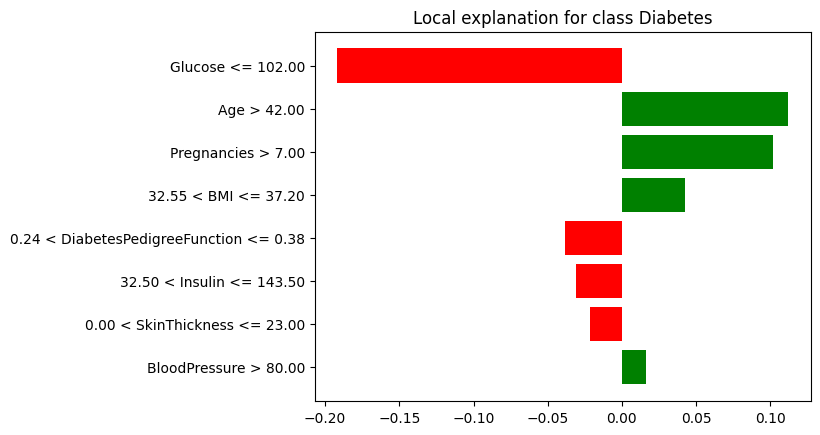

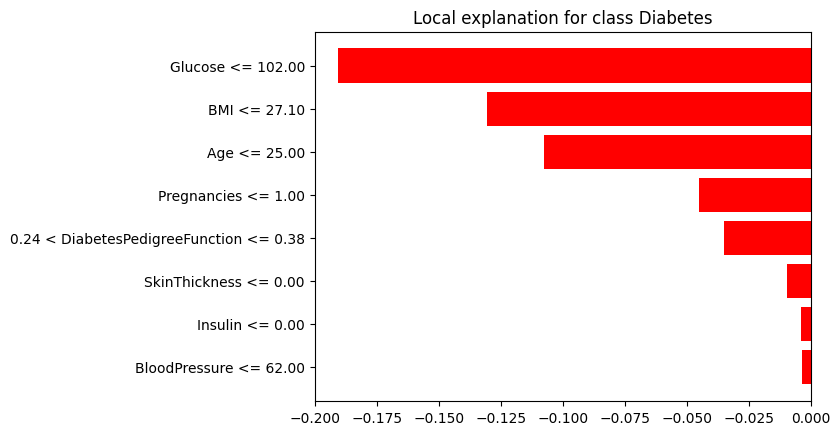

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create the explainer
explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    mode="classification"
)

# Explain predictions for 3 instances
for i in range(0, 3):
    explainer = explainer_lime.explain_instance(X_test.iloc[i].values, best_model.predict_proba, num_features=8)
    explainer.show_in_notebook(show_table=True, show_all=False)
    explainer.as_pyplot_figure()
    plt.show()


# SHAP

ExactExplainer explainer: 135it [01:01,  2.00it/s]


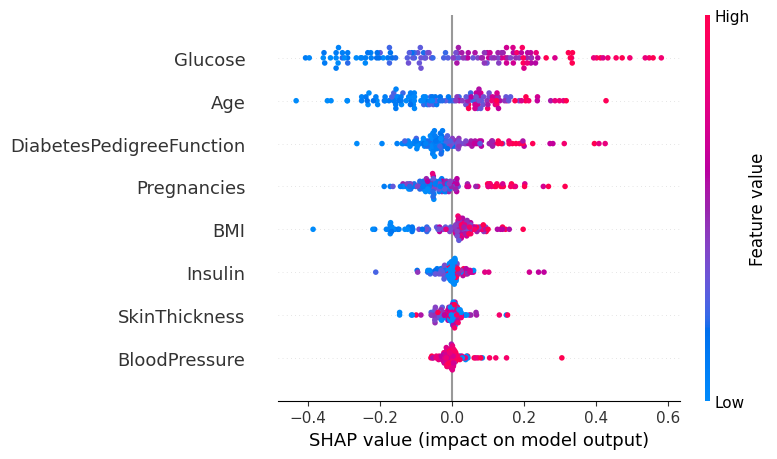

In [ ]:
shap_explainer = shap.Explainer(best_model.predict, X_train)
shap_values = shap_explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# PartialDependenceDisplay to plot both PDP and ICE

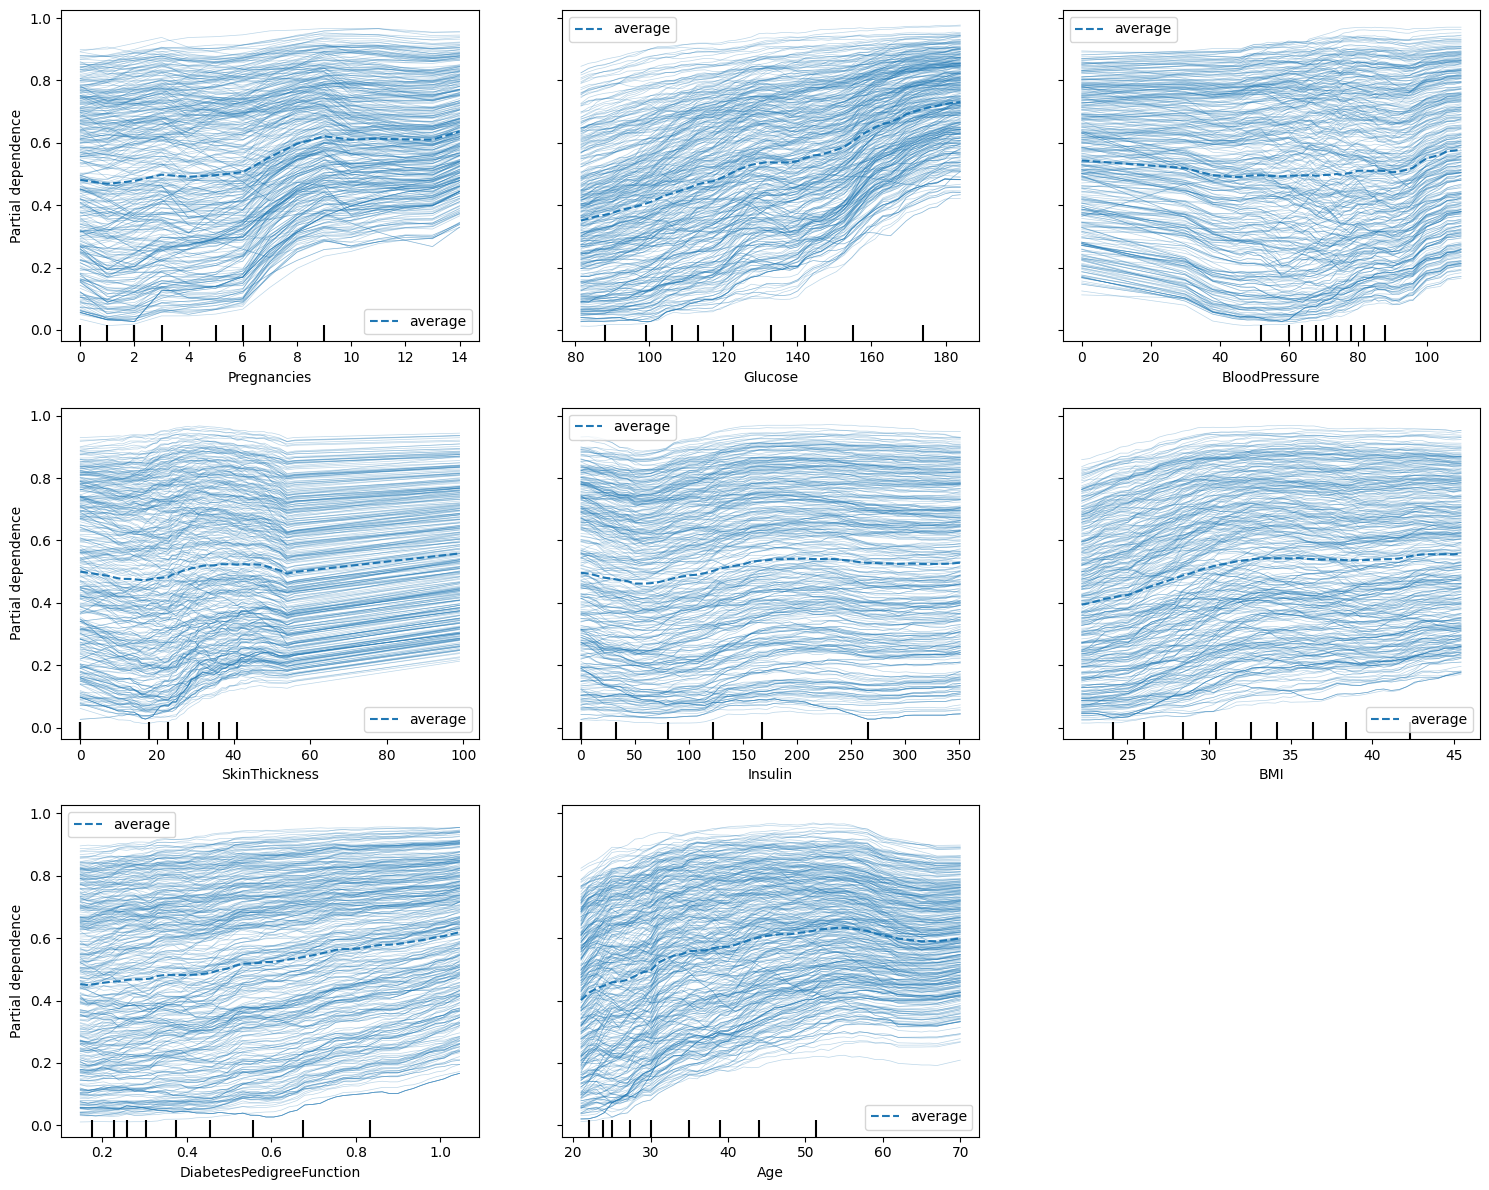

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(15, 12))

# PartialDependenceDisplay to plot both PDP and ICE
PartialDependenceDisplay.from_estimator(
    best_model,
    X_train,
    features=X_train.columns,
    grid_resolution=50,                # The number of points to plot along the feature's range
    kind='both',                       # Plot both Partial Dependence and ICE curves
    ax=ax,
    target=0,
    feature_names=X_train.columns
)

plt.tight_layout()
plt.show()


# Permutation Feature Importance (Residuals Error)

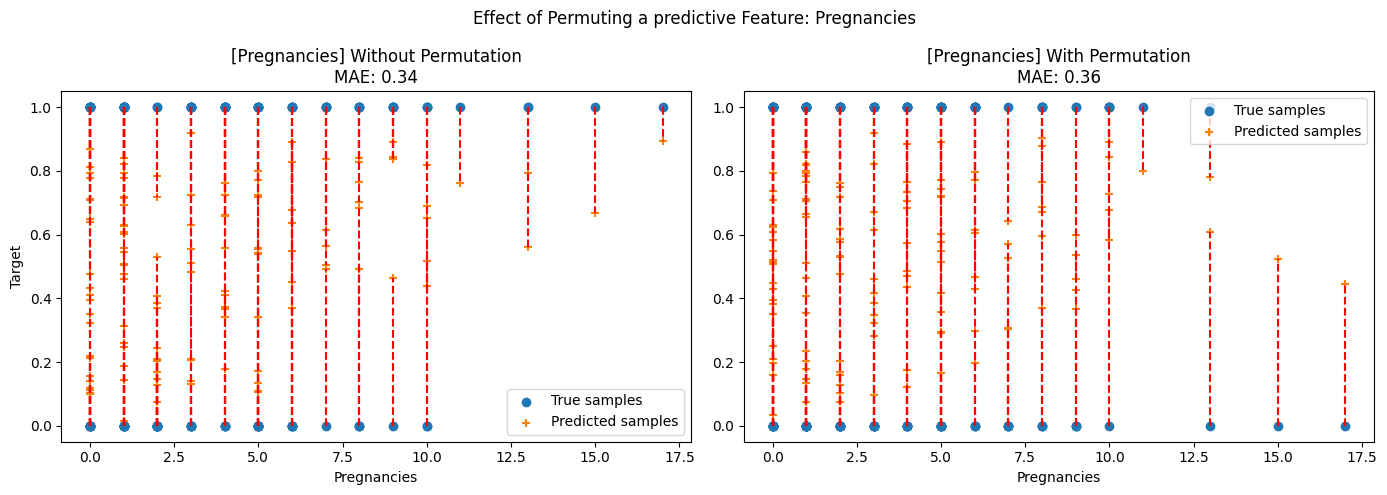

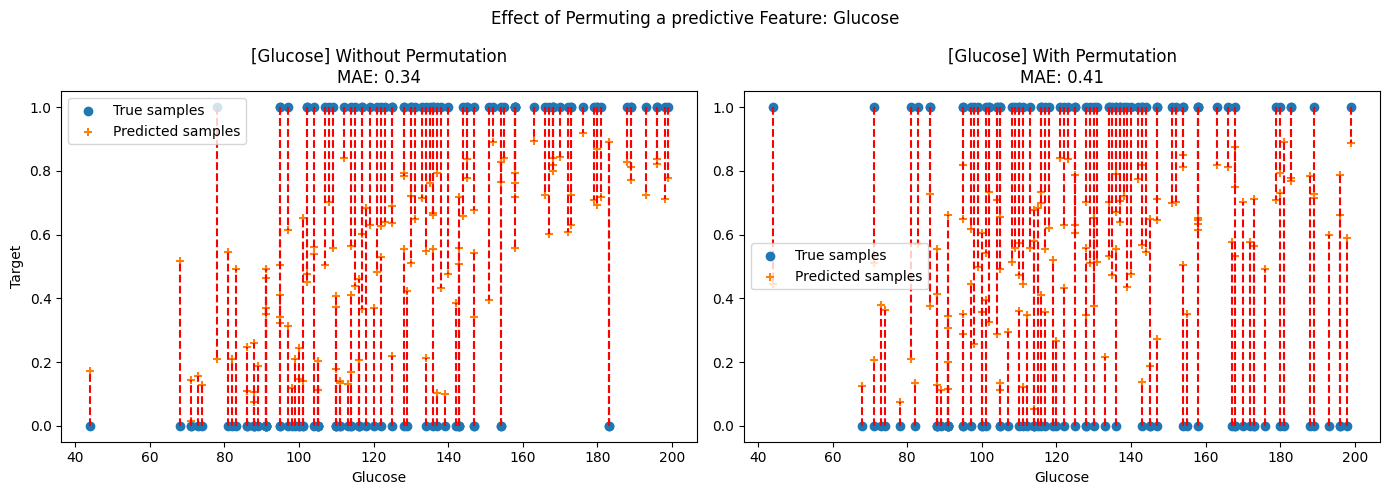

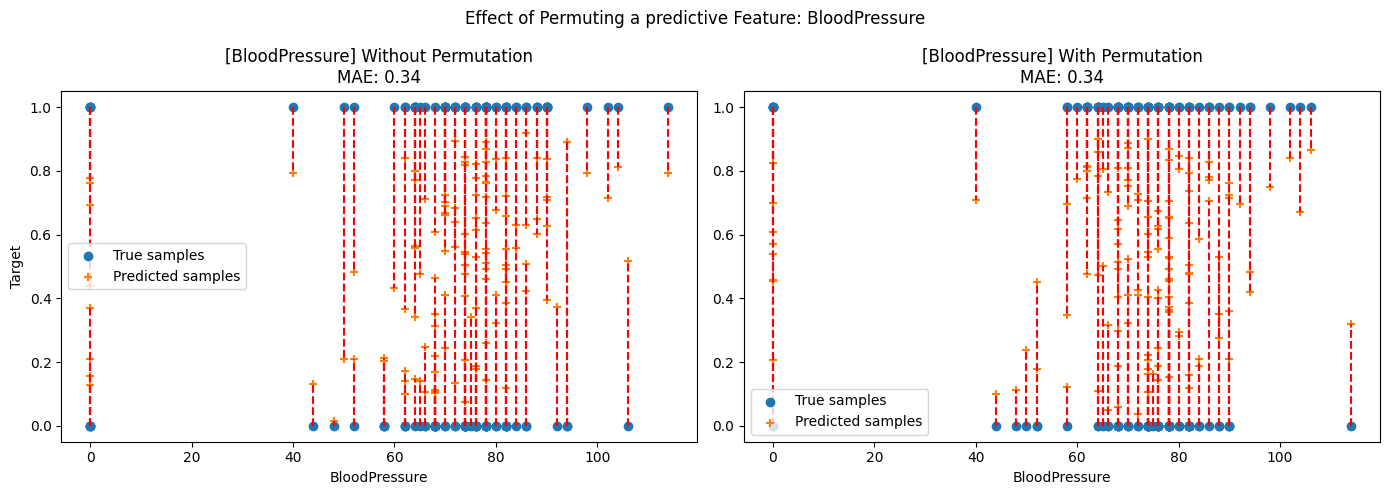

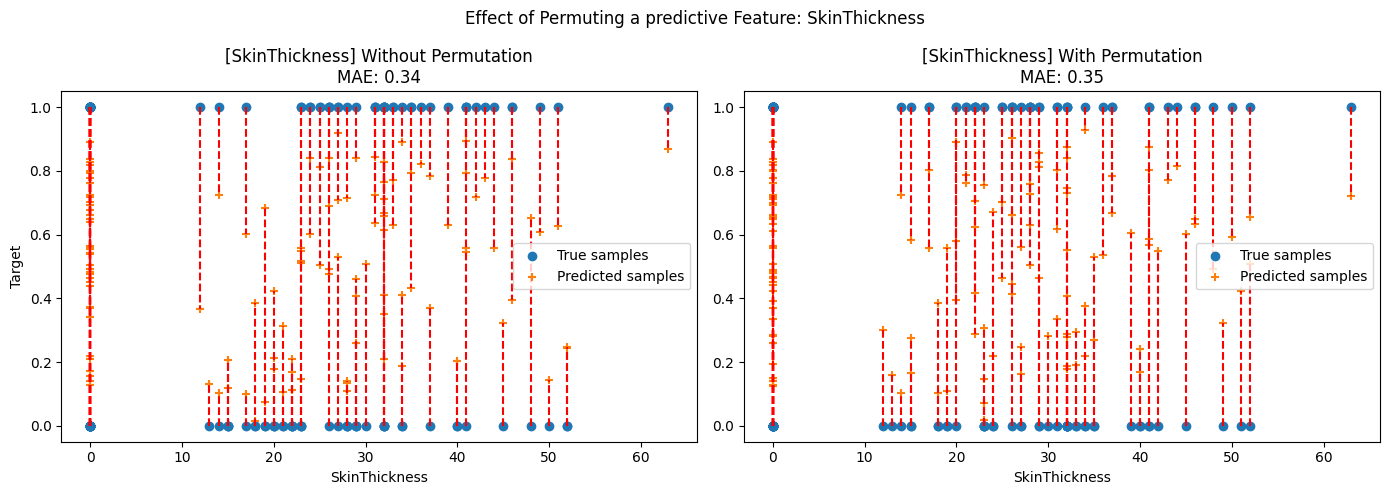

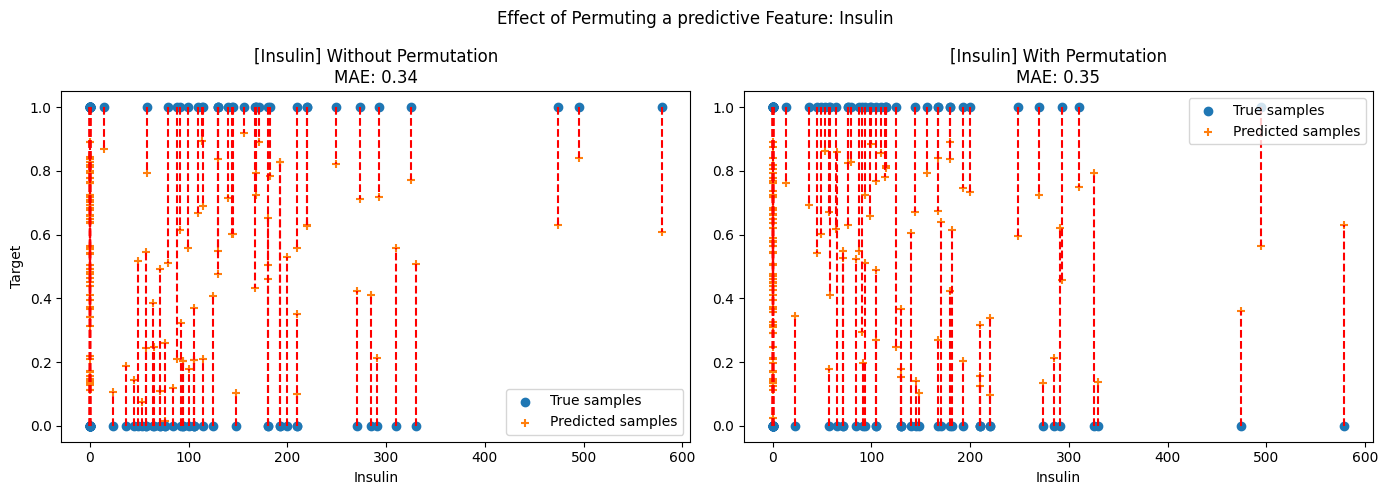

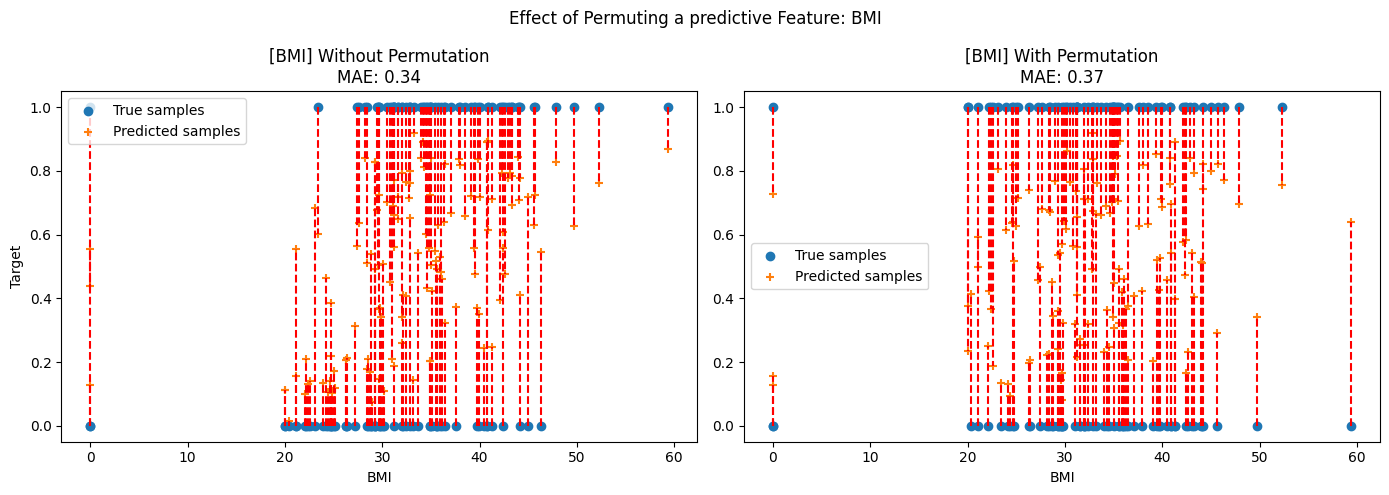

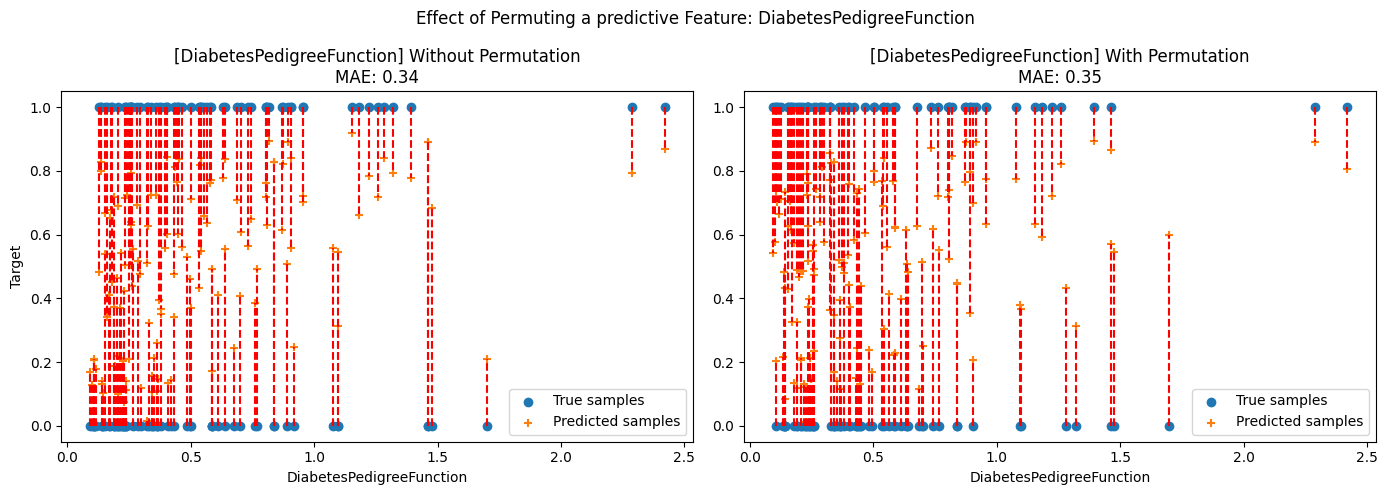

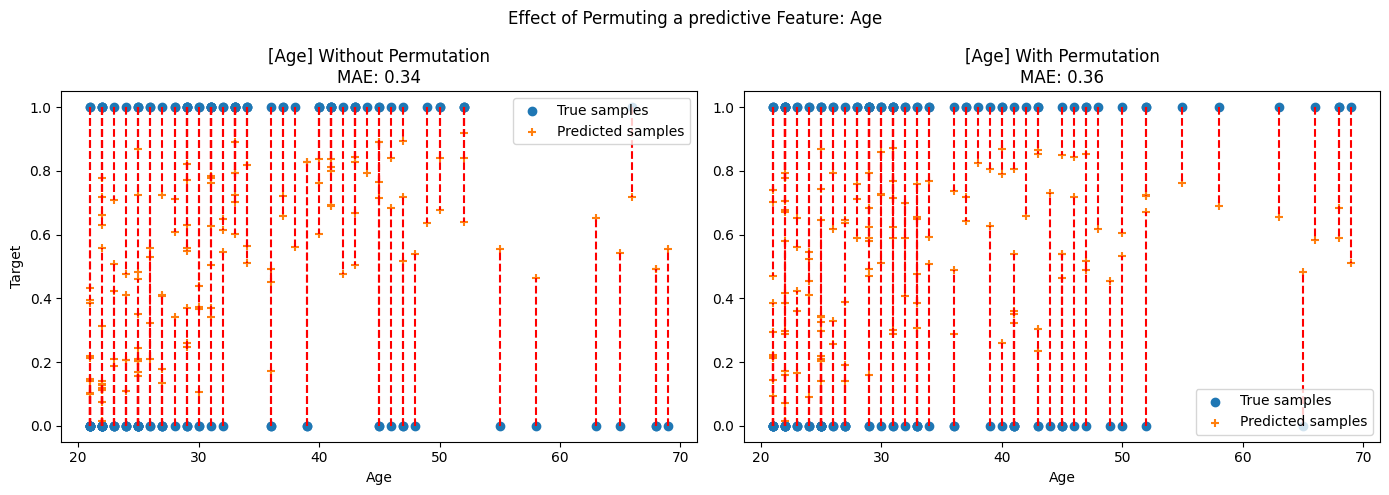

In [ ]:
# prediction on original data
y_pred = best_model.predict_proba(X_test)[:, 1]
mae = mean_absolute_error(y_test, y_pred)

# compare between before and after permutation
for i, feature_name in enumerate(X_test.columns):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))


    axes[0].scatter(X_test.iloc[:, i], y_test, label='True samples')
    axes[0].scatter(X_test.iloc[:, i], y_pred, label='Predicted samples', marker='+')
    for x, true, pred in zip(X_test.iloc[:, i], y_test, y_pred):
        axes[0].plot([x, x], [true, pred], 'r--')
    axes[0].set_title(f"[{feature_name}] Without Permutation\nMAE: {mae:.2f}")
    axes[0].set_xlabel(f"{feature_name}")
    axes[0].set_ylabel("Target")
    axes[0].legend()


    X_permuted = X_test.copy()
    X_permuted.iloc[:, i] = np.random.permutation(X_permuted.iloc[:, i])
    y_pred_permuted = best_model.predict_proba(X_permuted)[:, 1]
    permuted_mae = mean_absolute_error(y_test, y_pred_permuted)

    axes[1].scatter(X_permuted.iloc[:, i], y_test, label='True samples')
    axes[1].scatter(X_permuted.iloc[:, i], y_pred_permuted, label='Predicted samples', marker='+')
    for x, true, pred in zip(X_permuted.iloc[:, i], y_test, y_pred_permuted):
        axes[1].plot([x, x], [true, pred], 'r--')
    axes[1].set_title(f"[{feature_name}] With Permutation\nMAE: {permuted_mae:.2f}")
    axes[1].set_xlabel(f"{feature_name}")
    axes[1].legend()

    plt.suptitle(f"Effect of Permuting a predictive Feature: {feature_name}")
    plt.tight_layout()
    plt.show()


#  Sorting Feature Importance Using Permutation Feature Importance Using Accuracy

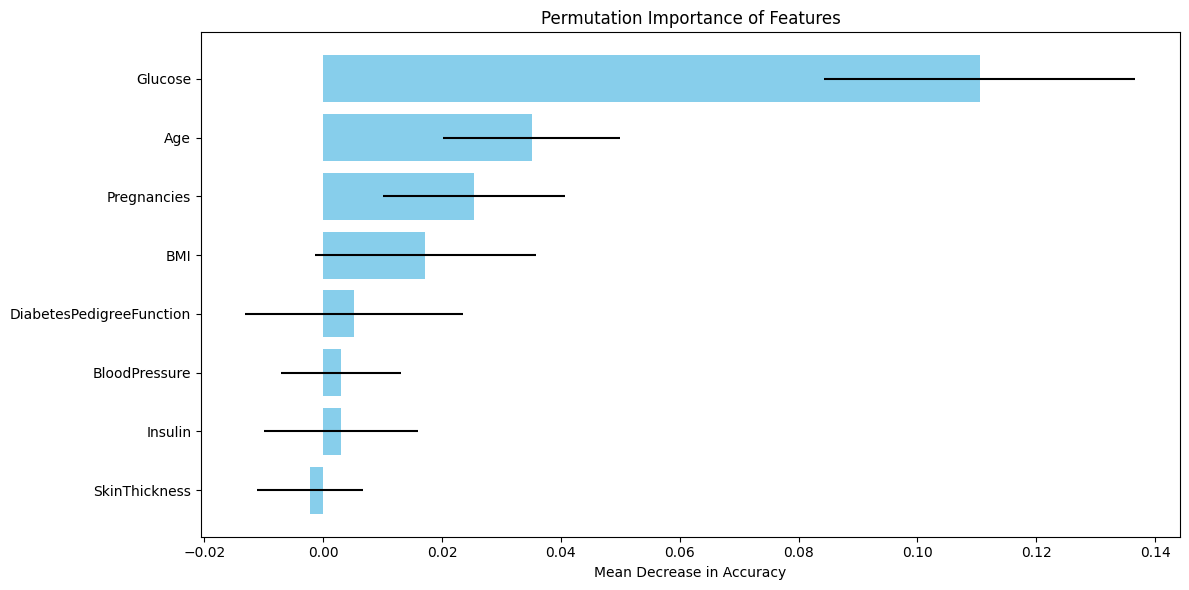

In [ ]:
# Calculate permutation importance using accuracy
result = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=1,
    scoring='accuracy'
)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_STD': result.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_Mean'], xerr=importance_df['Importance_STD'], color='skyblue')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Importance of Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
